In [1]:
# Análisis de Datos de Impacto del trabajo remoto en la salud mental


##El objetivo principal de este análisis es estudiar el impacto del trabajo remoto en la salud mental de los empleados, 
##ofreciendo información útil para investigadores, profesionales de recursos humanos y empresas interesadas en evaluar 
##cómo el trabajo a distancia influye en la productividad y el bienestar general. Estos datos permitirán identificar 
##tendencias en los niveles de estrés, el equilibrio entre la vida laboral y personal, y la satisfacción en el trabajo 
##en distintos entornos laborales (remoto, híbrido, presencial). Además, pueden ayudar a las organizaciones a evaluar 
##la necesidad de recursos de apoyo a la salud mental, mejorar el respaldo en el lugar de trabajo y optimizar las 
##políticas de trabajo remoto para promover una fuerza laboral más saludable y productiva.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv(r'C:\Users\GamingWorld\Documents\kaggle/Impact_of_Remote_Work_on_Mental_Health.csv')

In [4]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [5]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Mental_Health_Condition    1196
Physical_Activity          1629
dtype: int64

In [8]:
df['Mental_Health_Condition'].value_counts()


Mental_Health_Condition
Burnout       1280
Anxiety       1278
Depression    1246
Name: count, dtype: int64

In [9]:
df['Mental_Health_Condition'].fillna("No", inplace=True)


In [10]:
df['Physical_Activity'].fillna("No", inplace=True)


In [ ]:
#DIST DE EDAD

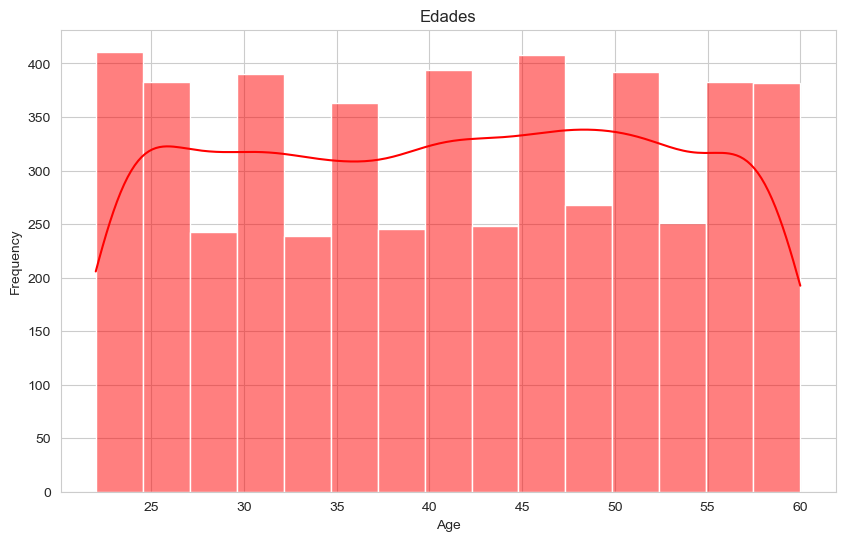

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='red')
plt.title('Edades')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
#DISTRIBUCION DE GENERO

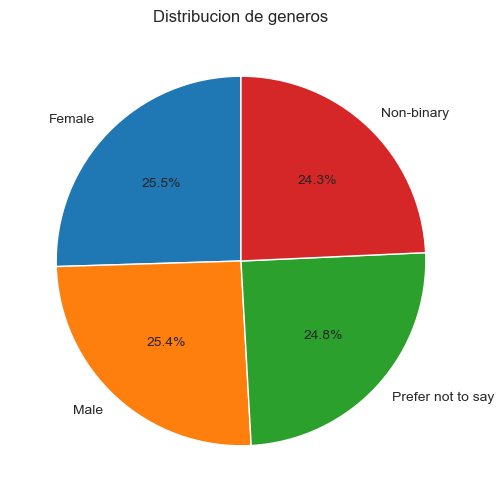

In [13]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de generos')
plt.show()

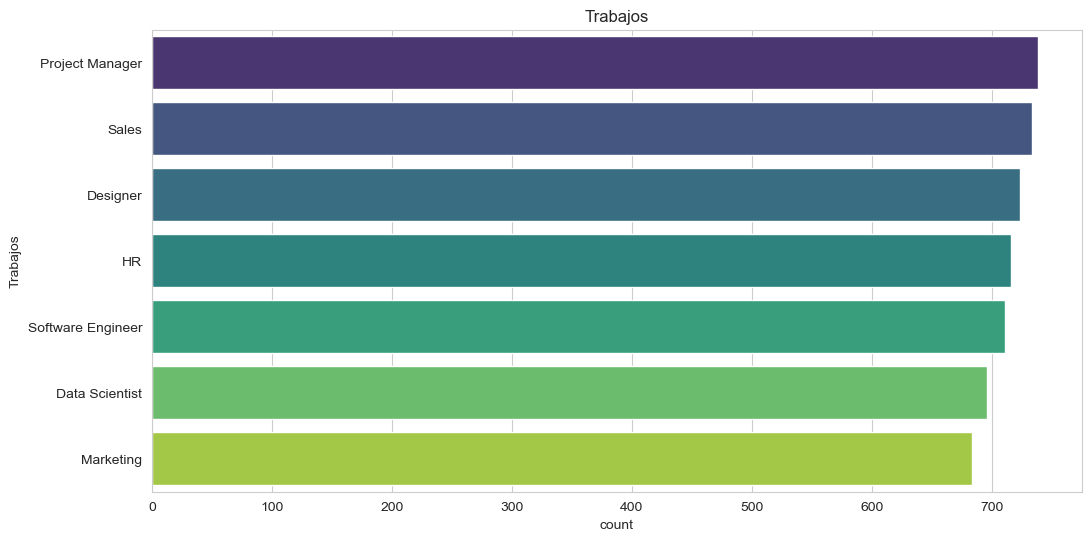

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Job_Role', order=df['Job_Role'].value_counts().index, palette='viridis')
plt.title('Trabajos')
plt.ylabel('Trabajos')
plt.show()

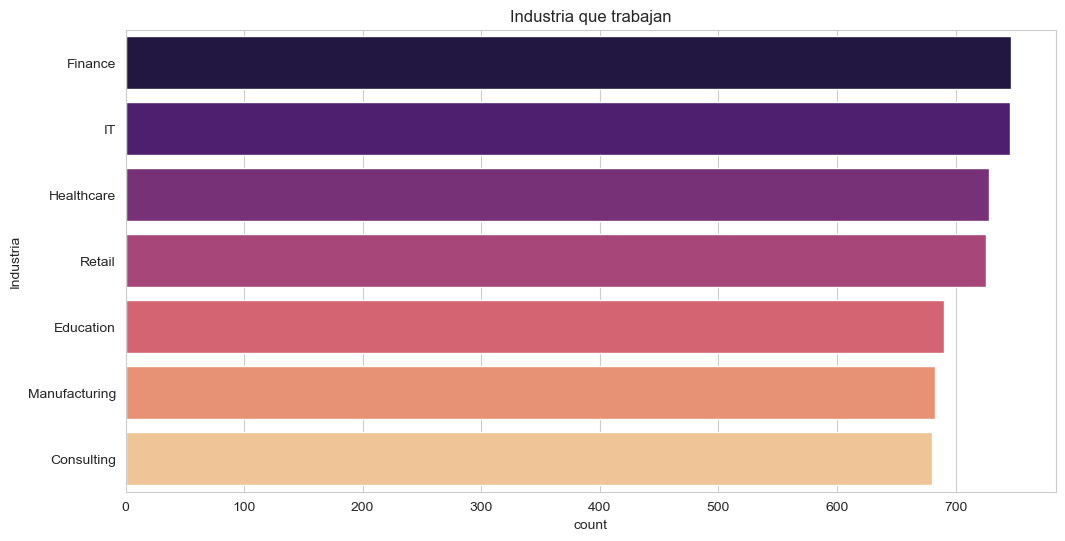

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='magma')
plt.title('Industria que trabajan')
plt.ylabel('Industria')
plt.show()

In [16]:
## lugar de trabajo vs productividad

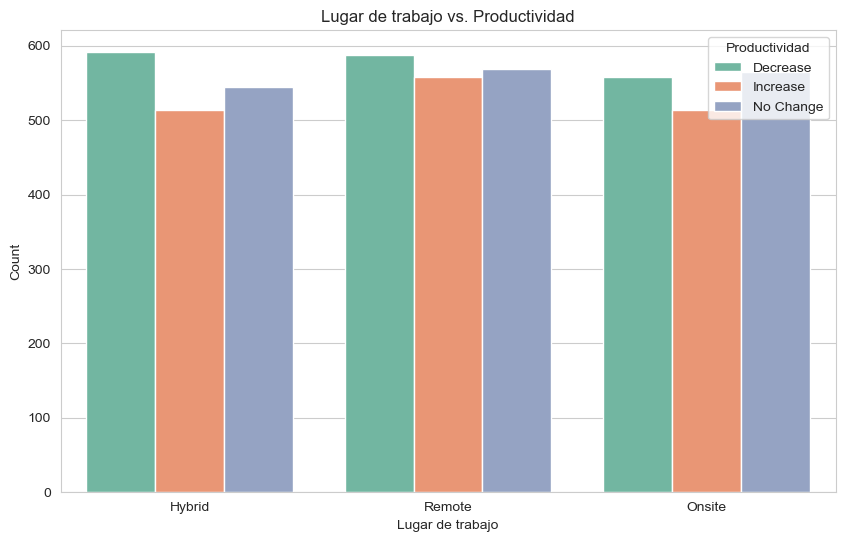

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Productivity_Change', palette='Set2')
plt.title('Lugar de trabajo vs. Productividad')
plt.xlabel('Lugar de trabajo')
plt.ylabel('Count')
plt.legend(title='Productividad')
plt.show()

In [18]:
## Situacion de la Salud Mental

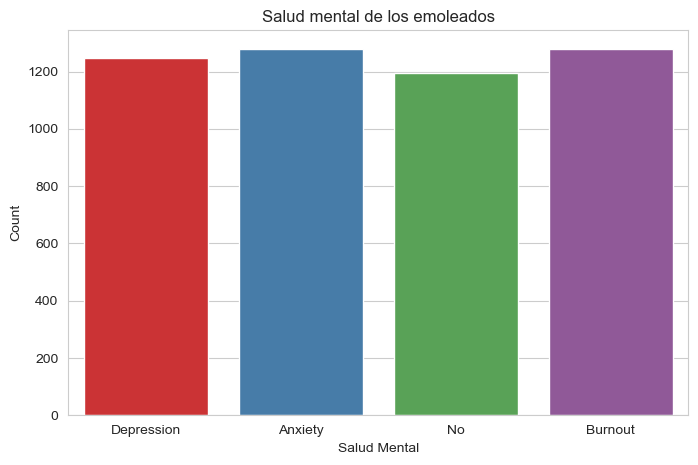

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Mental_Health_Condition', palette='Set1')
plt.title('Salud mental de los empleados')
plt.xlabel('Salud Mental')
plt.ylabel('Count')
plt.show()


In [20]:
##Acceso a recursos de salud mental

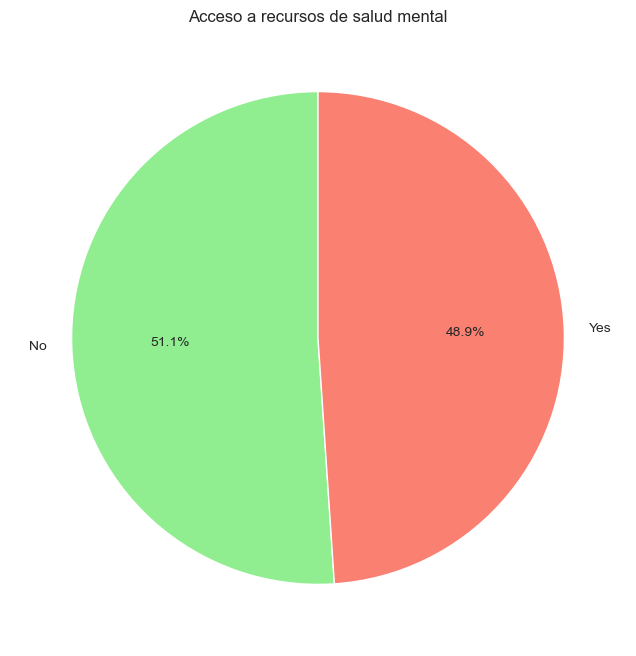

In [29]:
plt.figure(figsize=(8, 8))
df['Access_to_Mental_Health_Resources'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Acceso a recursos de salud mental')
plt.ylabel('')
plt.show()

In [22]:
##Actividad Fisica vs Satisfaccion con trabajo remot

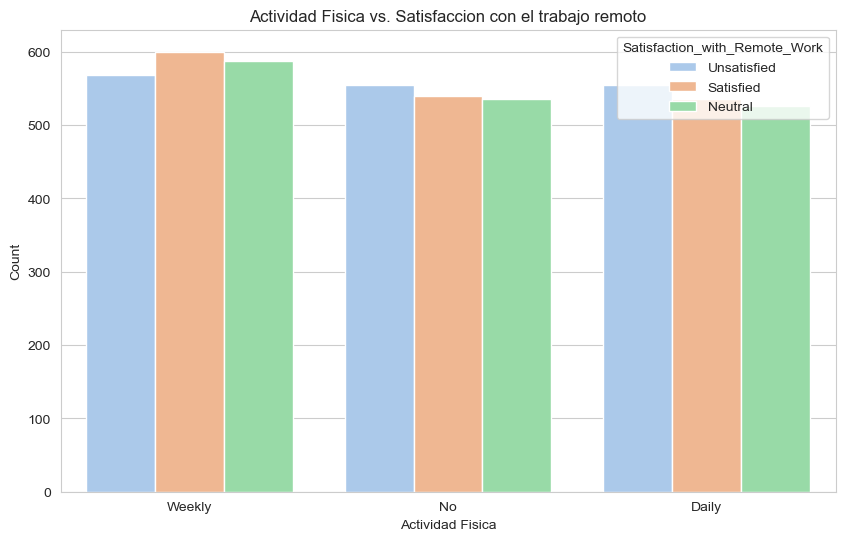

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Physical_Activity', hue='Satisfaction_with_Remote_Work', palette='pastel')
plt.title('Actividad Fisica vs. Satisfaccion con el trabajo remoto')
plt.xlabel('Actividad Fisica')
plt.ylabel('Count')

plt.show()

In [24]:
df['hours_group'] = np.select(
    [
        (df['Hours_Worked_Per_Week'] >= 20) & (df['Hours_Worked_Per_Week'] <= 30),
        (df['Hours_Worked_Per_Week'] >= 31) & (df['Hours_Worked_Per_Week'] <= 40),
        (df['Hours_Worked_Per_Week'] >= 41) & (df['Hours_Worked_Per_Week'] <= 50),
        (df['Hours_Worked_Per_Week'] >= 51) & (df['Hours_Worked_Per_Week'] <= 60)
    ],
    ["20-30", "31-40", "41-50", "51-60"],
    default="Other"
)
hours_distribution = df.groupby('hours_group').size().reset_index(name='count')



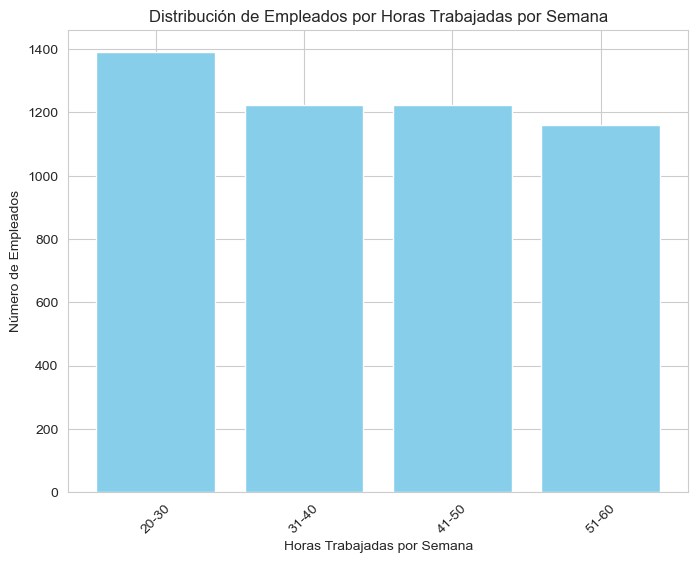

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(hours_distribution['hours_group'], hours_distribution['count'], color='skyblue')
plt.xlabel('Horas Trabajadas por Semana')
plt.ylabel('Número de Empleados')
plt.title('Distribución de Empleados por Horas Trabajadas por Semana')
plt.xticks(rotation=45)
plt.show()

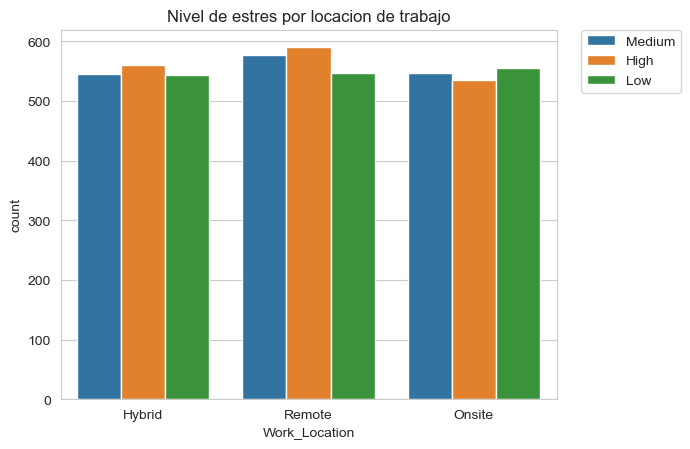

In [26]:
sns.countplot(data=df, x='Work_Location', hue='Stress_Level')
plt.title('Nivel de estres por locacion de trabajo')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [31]:
stress_distribution = df.groupby(['hours_group', 'Stress_Level']).size().reset_index(name='count')

# Mostrar una parte del resultado para asegurarnos de que está bien
print(stress_distribution.head())

  hours_group Stress_Level  count
0       20-30         High    454
1       20-30          Low    464
2       20-30       Medium    473
3       31-40         High    421
4       31-40          Low    416


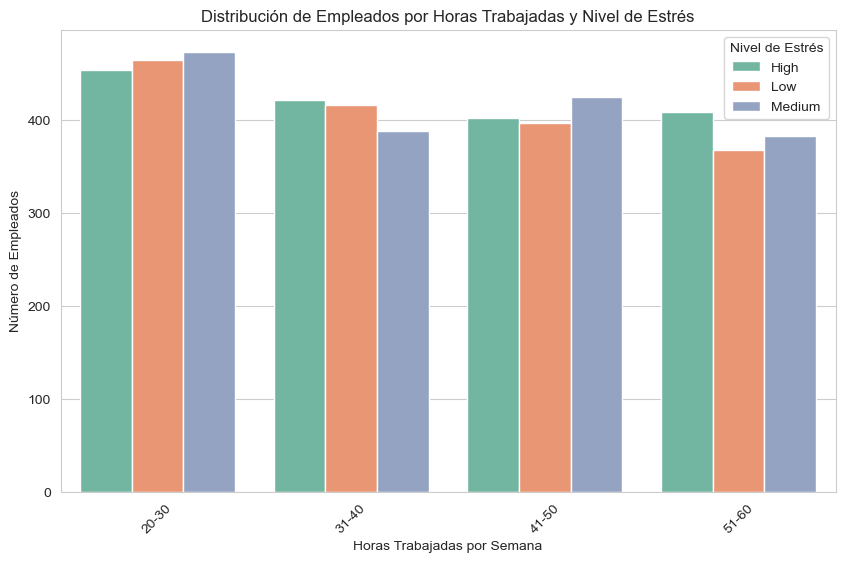

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=stress_distribution, x='hours_group', y='count', hue='Stress_Level', palette='Set2')
plt.xlabel('Horas Trabajadas por Semana')
plt.ylabel('Número de Empleados')
plt.title('Distribución de Empleados por Horas Trabajadas y Nivel de Estrés')
plt.xticks(rotation=45)
plt.legend(title='Nivel de Estrés')
plt.show()

In [ ]:
## Personas que trabajan mas horas, entre 31-40 y 51-60 horas, tienden a tener niveles de estres mas altos

In [35]:
location_stress_distribution = df.groupby(['Work_Location', 'Stress_Level']).size().reset_index(name='count')
print(location_stress_distribution)


  Work_Location Stress_Level  count
0        Hybrid         High    561
1        Hybrid          Low    543
2        Hybrid       Medium    545
3        Onsite         High    535
4        Onsite          Low    555
5        Onsite       Medium    547
6        Remote         High    590
7        Remote          Low    547
8        Remote       Medium    577


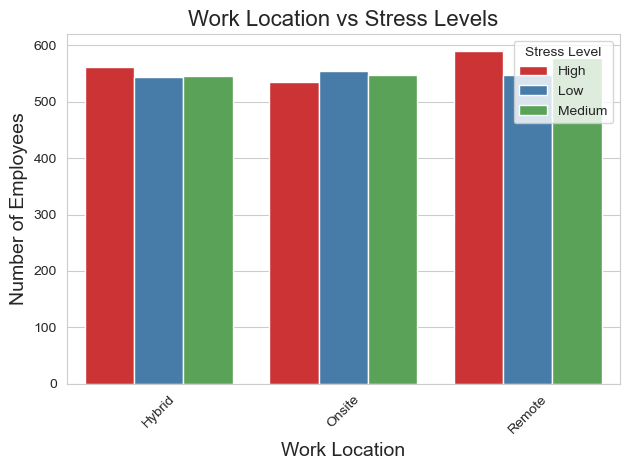

In [36]:
sns.barplot(data=location_stress_distribution, 
            x='Work_Location', 
            y='count', 
            hue='Stress_Level', 
            palette='Set1', 
            dodge=True)

# Personalizar el gráfico
plt.title('Work Location vs Stress Levels', fontsize=16)
plt.xlabel('Work Location', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visibilidad
plt.legend(title='Stress Level')
plt.tight_layout()  # Ajusta el layout para evitar que se corten las etiquetas

# Mostrar el gráfico
plt.show()


In [37]:
### La mayoria de empleados que trabajan remoto o hibrido tienen un gran nivel de estres

In [38]:
balance_stress_distribution = df.groupby(['Work_Life_Balance_Rating', 'Stress_Level']).size().reset_index(name='count')
print(balance_stress_distribution)


    Work_Life_Balance_Rating Stress_Level  count
0                          1         High    326
1                          1          Low    339
2                          1       Medium    358
3                          2         High    311
4                          2          Low    318
5                          2       Medium    338
6                          3         High    374
7                          3          Low    328
8                          3       Medium    351
9                          4         High    342
10                         4          Low    321
11                         4       Medium    317
12                         5         High    333
13                         5          Low    339
14                         5       Medium    305


In [39]:
### Altos niveles de estres en todos los niveles de trabajo